<a href="https://colab.research.google.com/github/Saurabh1Barasiya/tensorflow/blob/master/Deep_lr_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing library

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Deep learning project Fashion classifation

In [4]:
import keras
print(keras.__version__)

2.3.1


# Load the dataset

In [6]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
print(f"shape of X_train is {X_train.shape}")
print(f"shape of y_train is {y_train.shape}")

shape of X_train is (60000, 28, 28)
shape of y_train is (60000,)


In [12]:
X_train[0].shape 

(28, 28)

In [13]:
print(f"shape of X_test is {X_test.shape}")
print(f"shape of y_test is {y_test.shape}") 

shape of X_test is (10000, 28, 28)
shape of y_test is (10000,)


In [16]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [17]:
X_train[0].shape

(28, 28)

In [18]:
y_train[0] 

9

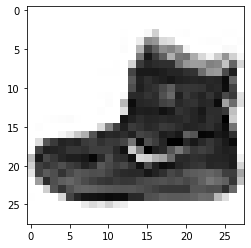

In [22]:
plt.imshow(X_train[0],cmap = 'Greys') 

In [23]:
class_labels = ["T-shirt/top","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle boot"]
'''
0 => T-shirt/top 
1 => Trouser 
2 => Pullover 
3 => Dress 
4 => Coat 
5 => Sandal 
6 => Shirt 
7 => Sneaker 
8 => Bag 
9 => Ankle boot '''

'\n0 => T-shirt/top \n1 => Trouser \n2 => Pullover \n3 => Dress \n4 => Coat \n5 => Sandal \n6 => Shirt \n7 => Sneaker \n8 => Bag \n9 => Ankle boot '

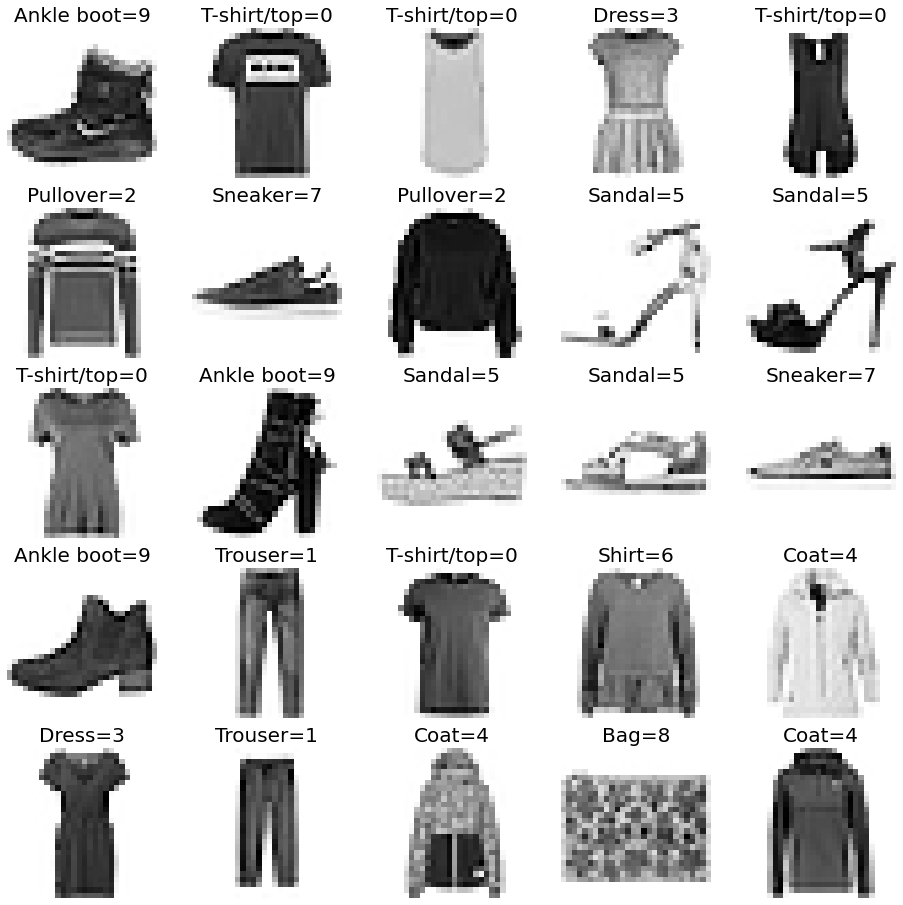

In [29]:
plt.figure(figsize=(16,16))
for i in  range(25):
      plt.subplot(5,5,i+1)
      plt.imshow(X_train[i],cmap='Greys')
      plt.axis('off') 
      plt.title(class_labels[y_train[i]]+'='+str(y_train[i]),fontsize=20) 


# Feature Scaling

In [30]:
X_train = X_train/255
X_test = X_test/255

In [31]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

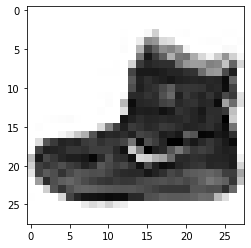

In [32]:
plt.imshow(X_train[0],cmap='Greys')

# Biuld Nurral network

In [35]:
model = keras.models.Sequential(
    [         keras.layers.Flatten(input_shape = [28,28]),
              keras.layers.Dense(units=32,activation='relu'),
              keras.layers.Dense(units=10,activation='softmax'), 
    ])

In [37]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


In [39]:
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=['accuracy'])

In [40]:
model.fit(X_train,y_train)    # By defult epochs ki value 1 hoti h.

Epoch 1/1
60000/60000 [==============================] - 3s 49us/step - loss: 0.5507 - accuracy: 0.8114


# Evalvate The result 


In [41]:
model.evaluate(X_test,y_test)

10000/10000 [==============================] - 0s 24us/step


[0.4645690141677856, 0.8398000001907349]

In [44]:
model.fit(X_train, y_train, epochs=20)

Epoch 1/20
60000/60000 [==============================] - 3s 43us/step - loss: 0.2891 - accuracy: 0.8938
Epoch 2/20
60000/60000 [==============================] - 3s 44us/step - loss: 0.2830 - accuracy: 0.8952
Epoch 3/20
60000/60000 [==============================] - 3s 45us/step - loss: 0.2794 - accuracy: 0.8972
Epoch 4/20
60000/60000 [==============================] - 3s 44us/step - loss: 0.2735 - accuracy: 0.8986
Epoch 5/20
60000/60000 [==============================] - 3s 44us/step - loss: 0.2695 - accuracy: 0.9020
Epoch 6/20
60000/60000 [==============================] - 3s 45us/step - loss: 0.2662 - accuracy: 0.9019
Epoch 7/20
60000/60000 [==============================] - 3s 44us/step - loss: 0.2634 - accuracy: 0.9031
Epoch 8/20
60000/60000 [==============================] - 3s 44us/step - loss: 0.2578 - accuracy: 0.9054
Epoch 9/20
60000/60000 [==============================] - 3s 44us/step - loss: 0.2561 - accuracy: 0.9059
Epoch 10/20
60000/60000 [==============================

In [45]:
model.evaluate(X_test,y_test)

10000/10000 [==============================] - 0s 23us/step


[0.3690816995382309, 0.8788999915122986]

In [46]:
y_pred = model.predict(X_test)

In [47]:
y_pred[0].round(2) 

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99],
      dtype=float32)

In [48]:
np.argmax(y_pred[0].round(2))

9

In [49]:
  '''
0 => T-shirt/top 
1 => Trouser 
2 => Pullover 
3 => Dress 
4 => Coat 
5 => Sandal 
6 => Shirt 
7 => Sneaker 
8 => Bag 
9 => Ankle boot '''

'\n0 => T-shirt/top \n1 => Trouser \n2 => Pullover \n3 => Dress \n4 => Coat \n5 => Sandal \n6 => Shirt \n7 => Sneaker \n8 => Bag \n9 => Ankle boot '

In [50]:
y_test[0]

9

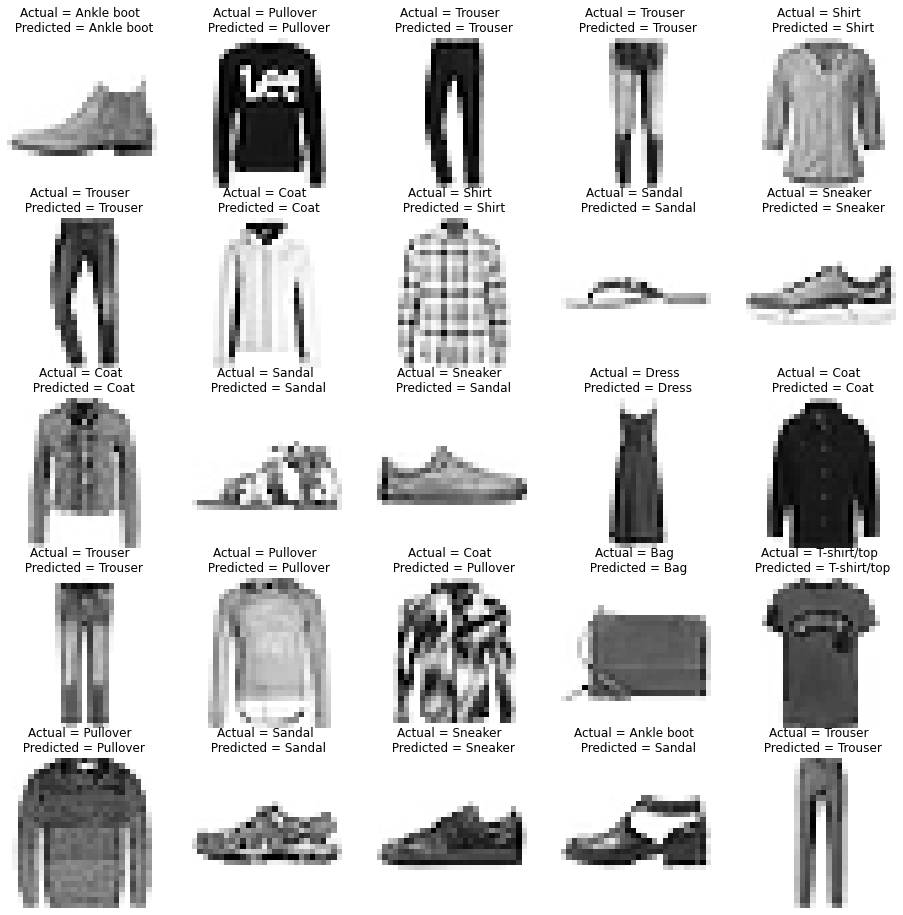

In [52]:
plt.figure(figsize=(16,16))
for i in range(25):
        plt.subplot(5,5,i+1)
        plt.imshow(X_test[i],cmap="Greys")
        plt.axis('off')
        plt.title("Actual= {} \n Predicted = {}".format(class_labels[y_test[i]], class_labels[np.argmax(y_pred[i])]))
        plt.title(f"Actual = {class_labels[y_test[i]]} \n Predicted = {class_labels[np.argmax(y_pred[i])]}")  





In [54]:
from sklearn.metrics import  confusion_matrix
cm = confusion_matrix(y_test,[np.argmax(i) for i in y_pred]) 

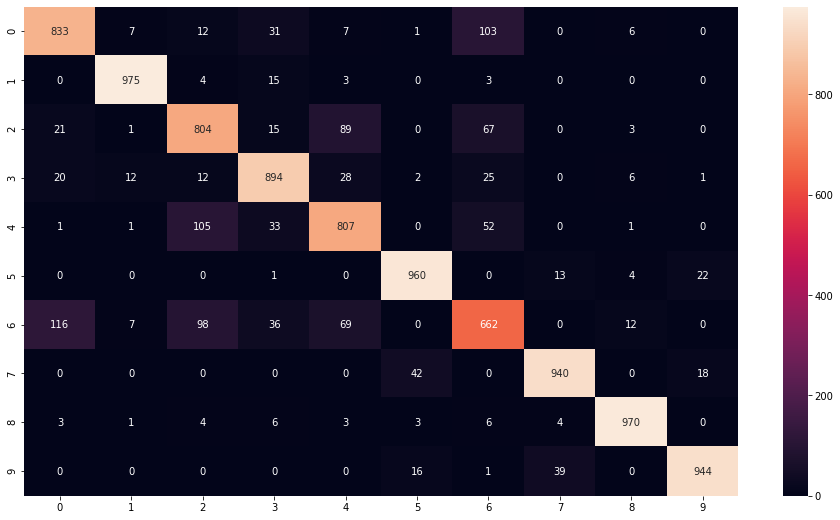

In [60]:
plt.figure(figsize=(16,9))
sns.heatmap(cm, annot=True, fmt = "d")   

# Classifation report

In [63]:
from sklearn.metrics import classification_report
cr = classification_report(y_test,[np.argmax(i) for i in y_pred] , target_names=class_labels)  

In [64]:
print(cr)

              precision    recall  f1-score   support

 T-shirt/top       0.84      0.83      0.84      1000
     Trouser       0.97      0.97      0.97      1000
    Pullover       0.77      0.80      0.79      1000
       Dress       0.87      0.89      0.88      1000
        Coat       0.80      0.81      0.80      1000
      Sandal       0.94      0.96      0.95      1000
       Shirt       0.72      0.66      0.69      1000
     Sneaker       0.94      0.94      0.94      1000
         Bag       0.97      0.97      0.97      1000
  Ankle boot       0.96      0.94      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

